In [34]:
import os

# Define the path to the output folder
output_folder = "../../output/leafSize"

# Get a list of all subfolders in the output folder
subfolders = [f.path for f in os.scandir(output_folder) if f.is_dir()]

# Initialize an empty list to store the contents of the output files
output_lines = []

# Iterate over each subfolder
for subfolder in subfolders:
    # Define the path to the output file in the current subfolder
    output_file = os.path.join(subfolder, "output.csv")
    
    # Read the contents of the output file
    with open(output_file, "r") as file:
        lines = file.readlines()
    
    # Append the lines to the output_lines list
    output_lines.extend(lines)

# Define the path to the merged output file
merged_file = os.path.join(".", "merged.csv")

# Write the merged output lines to the merged output file
with open(merged_file, "w") as file:
    file.writelines(output_lines)


In [35]:
with open('./merged.csv', 'r') as file:
    lines = file.readlines()

# Remove all spaces in all rows
lines = [line.replace(' ', '') for line in lines]

# Remove lines that are the same as the first one
header = lines[0]
lines = [line for line in lines[1:] if line != lines[0]]

# Join the lines back into a single string
output = ''.join(lines)

# Save the output to a file
with open('preprocessed.csv', 'w') as file:
    file.write(header)
    file.write(output)


In [36]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('preprocessed.csv')
df = df[df['time'] != 0]
df.drop('run_id', axis=1, inplace=True)
df.drop('bin_name', axis=1, inplace=True)

# Display the DataFrame
df.to_csv('preprocessed.csv', index=False)


In [37]:
# Drop columns where all values are the same
df = df.loc[:, df.nunique() != 1]
df

const_pageSizeLeaf  data_name  data_size           op  payload_size  \
0                   4096        int   39178519  ycsb_e_init             5   
1                   4096        int   39178519       ycsb_e             5   
2                   4096  data/urls    4793734  ycsb_c_init             3   
3                   4096  data/urls    4793734       ycsb_c             3   
4                    256        int   21111784  ycsb_c_init            13   
...                  ...        ...        ...          ...           ...   
6525               32768  data/urls    5566722       ycsb_c            10   
6526                2048  data/urls    4176033  ycsb_c_init             1   
6527                2048  data/urls    4176033       ycsb_c             1   
6532                 512        int   42660406  ycsb_e_init             8   
6533                 512        int   42660406       ycsb_e             8   

       rand_seed    time  nodeCount_Leaf  nodeCount_Inner  \
0     1704650157  12.828          238865             2046   
1     1704650157  10.301          241993             2053   
2     1704650188   2.402           48654              648   
3     1704650188   5.326           48654              648   
4     1704650198   9.809         5376895            35911   
...          ...     ...             ...              ...   
6525  1704598819   5.750            9195              134   
6526  1704598830   2.013           79914             1007   
6527  1704598830   5.177           79914             1007   
6532  1704598841  17.838         2948580            19009   
6533  1704598841  17.802         2982924            19398   

      counted_final_key_count      cycle     instr  L1_miss  LLC_miss  \
0                    38928519   1846.225  1050.819   38.525    27.281   
1                    39428607   5788.257  4582.011   57.636    33.884   
2                     4793734   2801.001  1559.576   61.981    36.343   
3                     4793734   2981.107  1176.047   42.987    27.477   
4                    21111784   2644.519  1697.172   32.800    19.411   
...                       ...        ...       ...      ...       ...   
6525                  5566722   3177.795  1207.850   54.858    37.506   
6526                  4176033   2674.138  1555.032   54.963    30.490   
6527                  4176033   2876.609  1192.859   42.294    25.784   
6532                 42410406   2390.435  1193.231   28.734    17.185   
6533                 42910330  10136.747  6376.407   95.157    63.558   

      br_miss      task       scale    IPC    GHz  
0      11.774   329.503  38928519.0  0.569  5.603  
1      15.268  1030.044  10000000.0  0.792  5.619  
2      17.487   501.140   4793734.0  0.557  5.589  
3      13.429   532.581  10000000.0  0.394  5.597  
4      16.664   464.579  21111784.0  0.642  5.692  
...       ...       ...         ...    ...    ...  
6525   13.344   575.000  10000000.0  0.380  5.527  
6526   17.146   482.022   4176033.0  0.582  5.548  
6527   13.329   517.701  10000000.0  0.415  5.557  
6532   13.599   420.592  42410406.0  0.499  5.683  
6533   37.457  1780.111  10000000.0  0.629  5.694  

[5872 rows x 19 columns]

In [38]:
df.drop(['cycle', 'instr', 'LLC_miss','L1_miss', 'br_miss', 'counted_final_key_count', 'GHz', 'task', 'IPC','rand_seed'], axis=1, inplace=True)


In [39]:
df['space_use'] = df['nodeCount_Leaf'] * df['const_pageSizeLeaf'] / df['data_size'] #space use per record 

df['time_per_op'] = df['time'] / df['scale']
df.drop(['time', 'scale'], axis=1, inplace=True)



In [40]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(['object']).columns

print("Number of columns:", df.shape[1])

# Apply one-hot encoding to non-numeric columns
df = pd.get_dummies(df, columns=non_numeric_columns)

print("Number of columns after one-hot:", df.shape[1])

Number of columns: 9
Number of columns after one-hot: 13


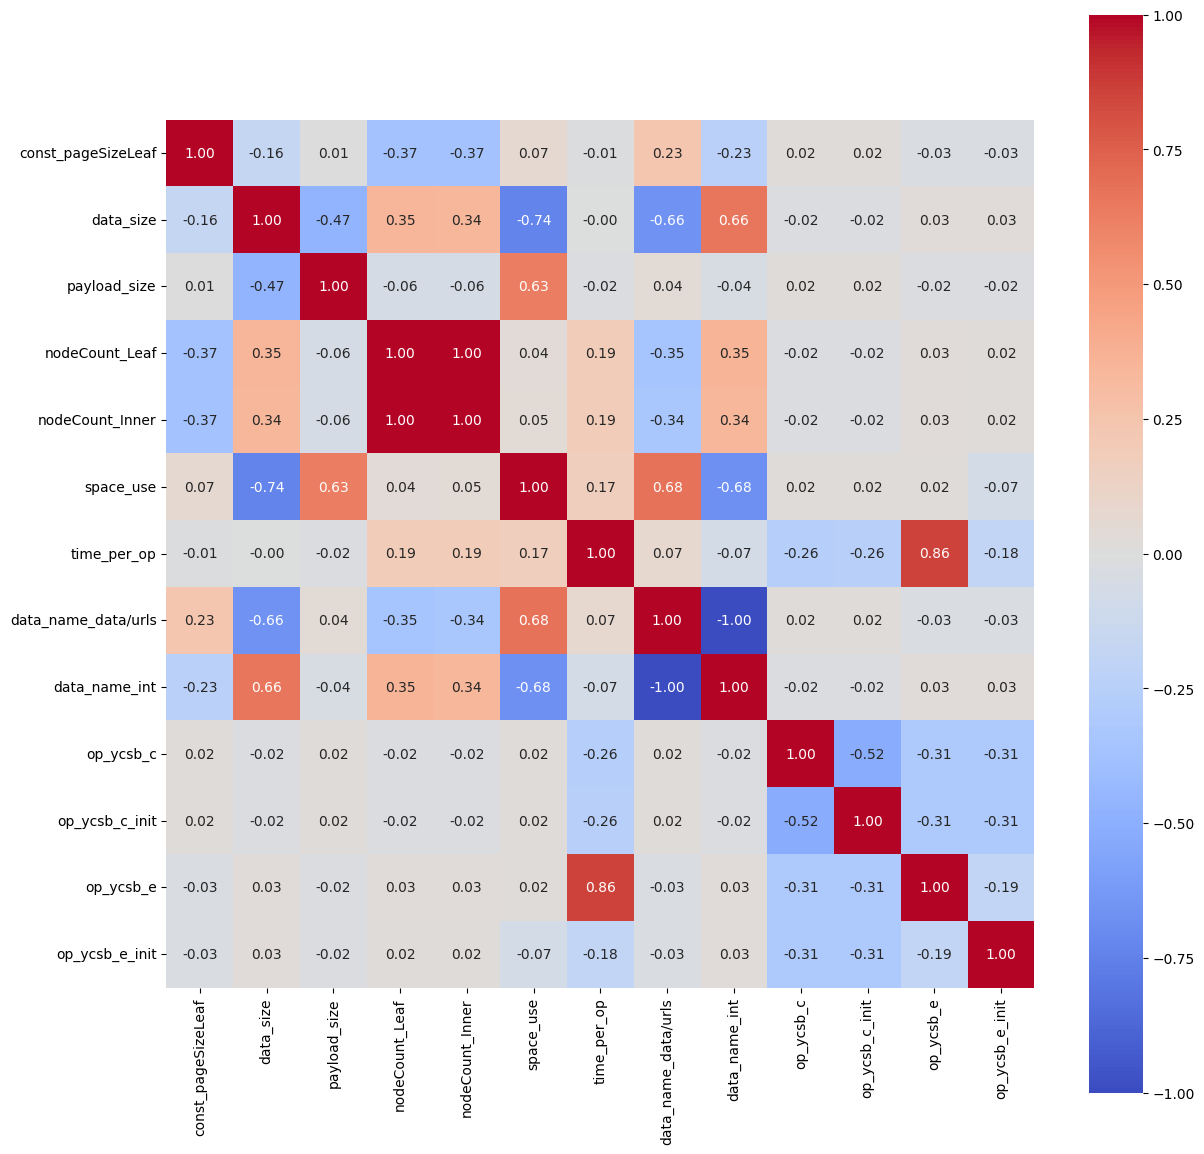

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')

plt.show()

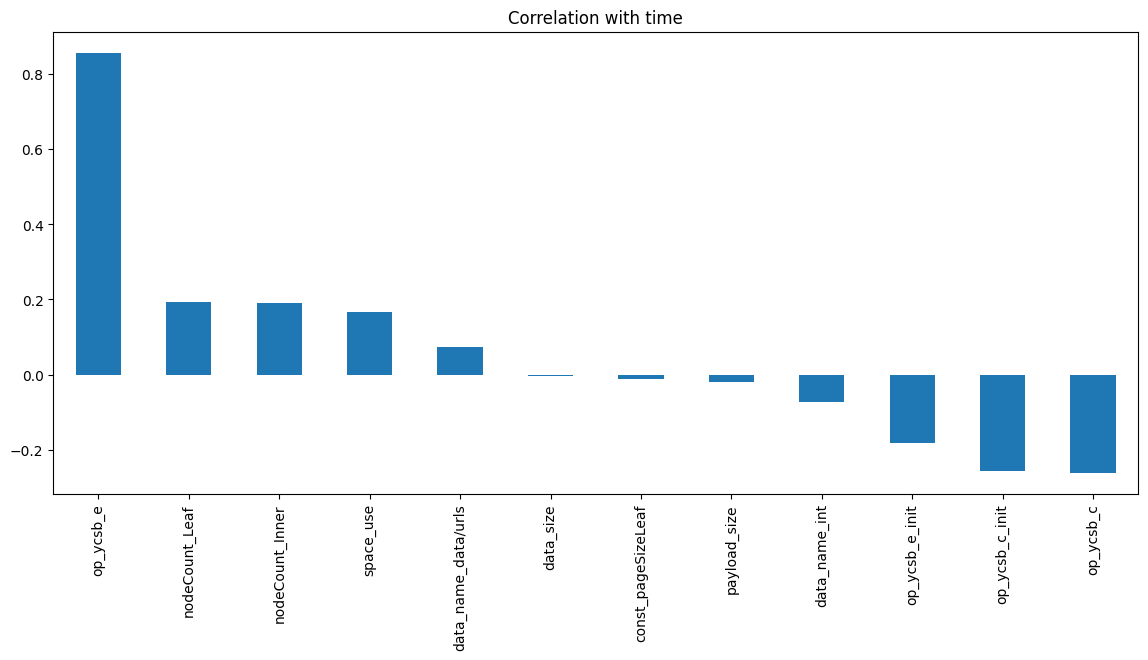

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get correlation of 'time' with other fields
time_correlation = correlation_matrix['time_per_op']

# Create a bar plot for 'time' correlation
plt.figure(figsize=(14, 6))
time_correlation.drop('time_per_op').sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with time')
plt.show()

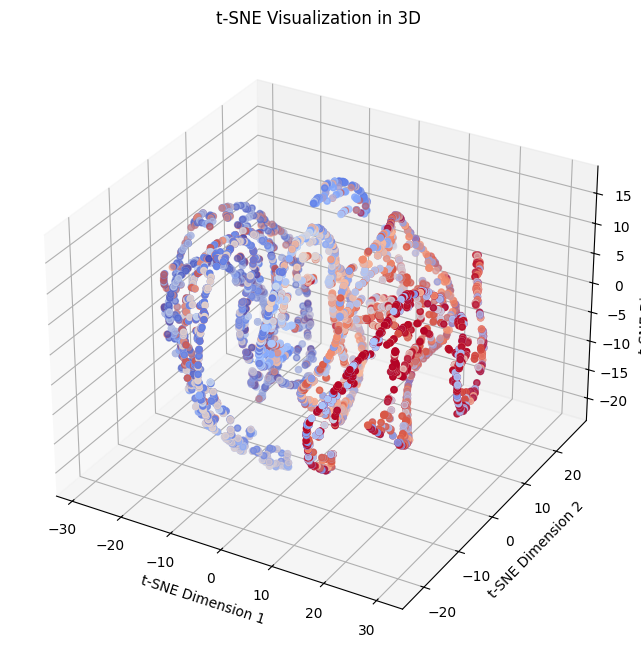

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Run t-SNE algorithm with 3 dimensions
tsne = TSNE(n_components=3, random_state=42)
df['percentile bracket'] = pd.qcut(df['time'], q=10, labels=False, duplicates='drop') + 1
tsne_data = tsne.fit_transform(df.drop(['time', 'percentile bracket'], axis=1))

# Create a 3D scatter plot of the t-SNE data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=df['percentile bracket'], cmap='coolwarm')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.title('t-SNE Visualization in 3D')
plt.show()


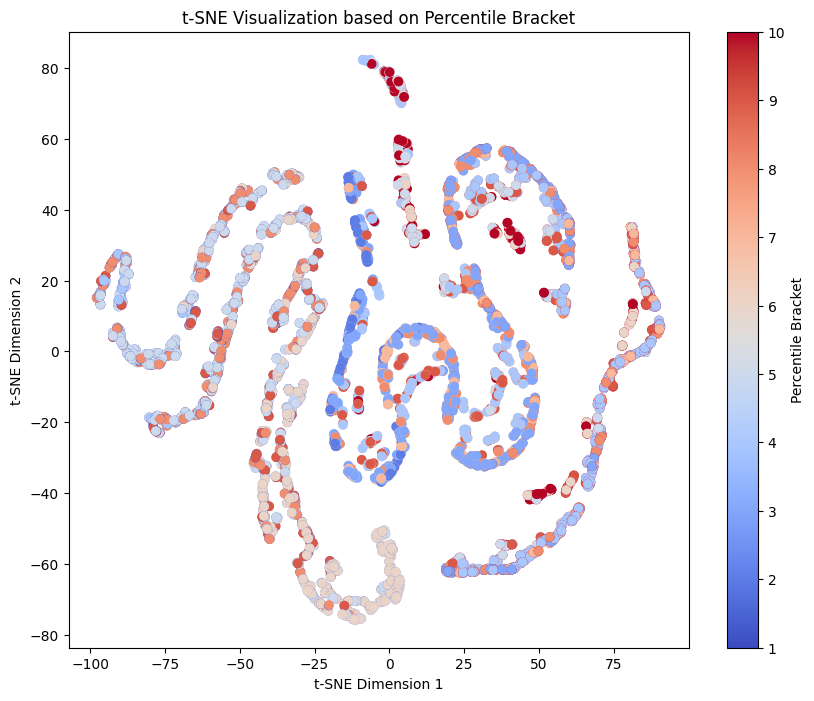

In [19]:
from sklearn.manifold import TSNE

# Create a t-SNE instance
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_data = tsne.fit_transform(df.drop(['time', 'percentile bracket'], axis=1))

# Create a scatter plot of the t-SNE data
plt.figure(figsize=(10, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=df['percentile bracket'], cmap='coolwarm')
plt.colorbar(label='Percentile Bracket')
plt.title('t-SNE Visualization based on Percentile Bracket')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [26]:
print(df.columns)


Index(['const_pageSizeLeaf', 'data_size', 'payload_size', 'rand_seed', 'time',
       'nodeCount_Leaf', 'nodeCount_Inner', 'space_use', 'percentile bracket',
       'data_name_data/urls', 'data_name_int', 'op_ycsb_c', 'op_ycsb_c_init',
       'op_ycsb_e', 'op_ycsb_e_init'],
      dtype='object')


In [44]:
# Create a dataset where data_name_urls is set
df_data_name_urls = df[df['data_name_data/urls']==True]

# Create a dataset where data_name_int is set
df_data_nam_int = df[df['data_name_int']==True]
df_data_name_urls.drop(['data_name_data/urls', 'data_name_int'], axis=1, inplace=True)
df_data_nam_int.drop(['data_name_data/urls', 'data_name_int'], axis=1, inplace=True)



/tmp/ipykernel_1589/3777381088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_name_urls.drop(['data_name_data/urls', 'data_name_int'], axis=1, inplace=True)
/tmp/ipykernel_1589/3777381088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_nam_int.drop(['data_name_data/urls', 'data_name_int'], axis=1, inplace=True)


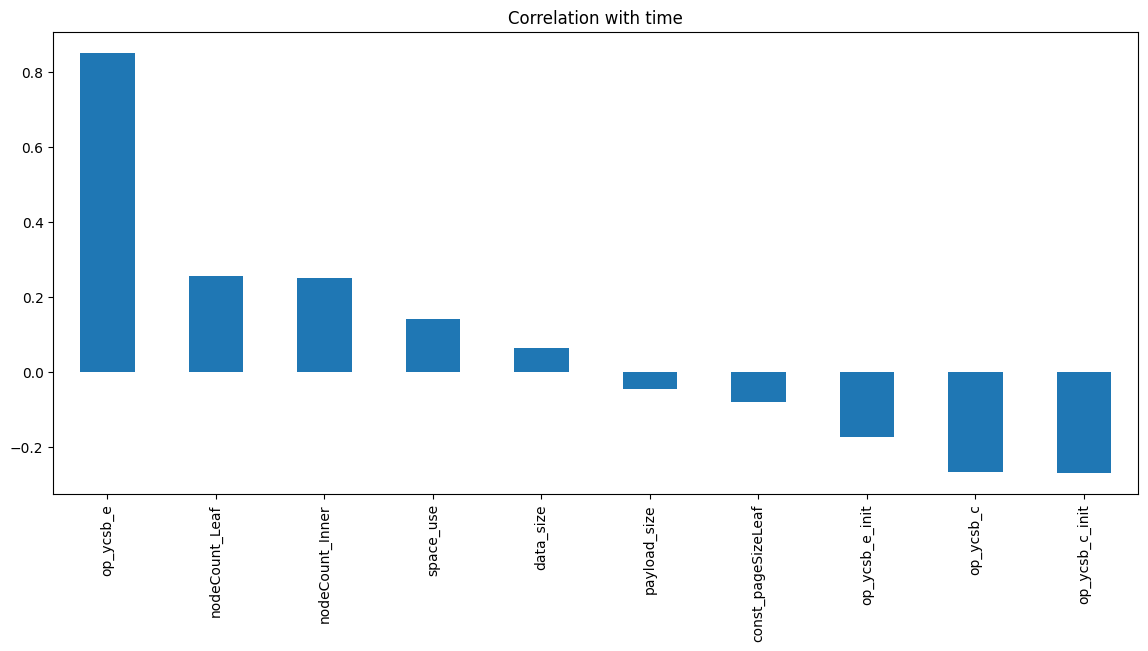

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute correlation matrix
correlation_matrix = df_data_nam_int.corr(numeric_only=True)

# Get correlation of 'time' with other fields
time_correlation = correlation_matrix['time_per_op']

# Create a bar plot for 'time' correlation
plt.figure(figsize=(14, 6))
time_correlation.drop('time_per_op').sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with time')
plt.show()

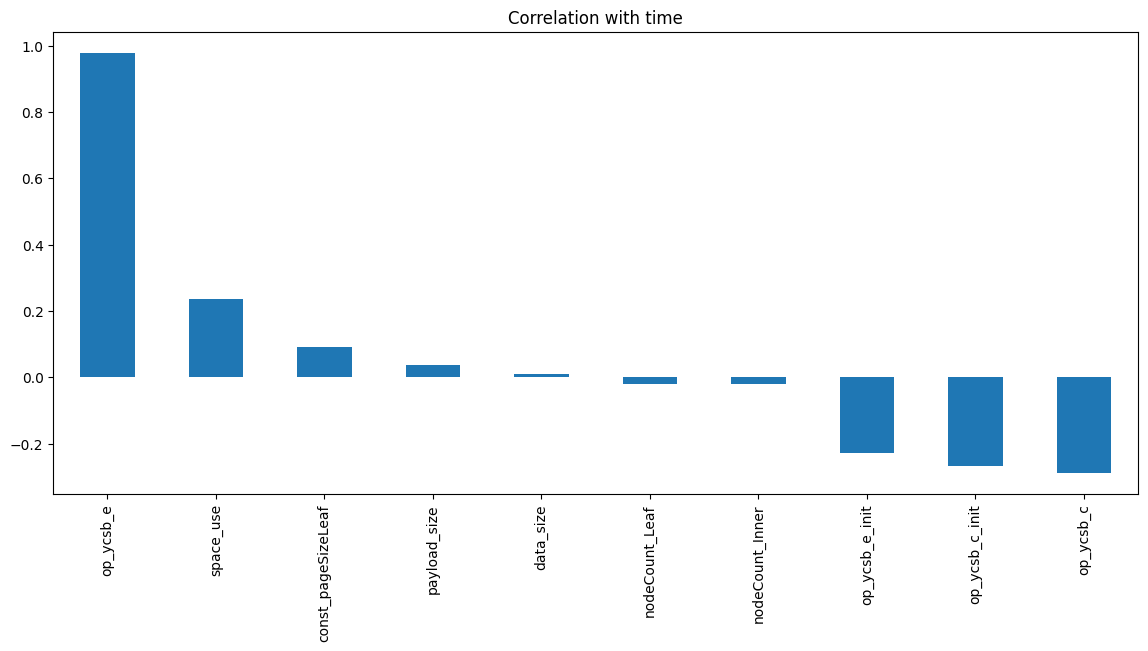

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute correlation matrix
correlation_matrix = df_data_name_urls.corr(numeric_only=True)

# Get correlation of 'time' with other fields
time_correlation = correlation_matrix['time_per_op']

# Create a bar plot for 'time' correlation
plt.figure(figsize=(14, 6))
time_correlation.drop('time_per_op').sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with time')
plt.show()

In [12]:
df_data_nam_int

const_pageSizeLeaf  data_size  payload_size    time  nodeCount_Leaf  \
0                   4096   39178519             5  12.828          238865   
1                   4096   39178519             5  10.301          241993   
4                    256   21111784            13   9.809         5376895   
5                    256   21111784            13   4.919         5376895   
8                   1024   20978270            12   7.230          755045   
...                  ...        ...           ...     ...             ...   
6513                 256   20706489             9   4.872         4197213   
6520               16384   46526272             7  21.313           74859   
6521               16384   46526272             7   3.796           74859   
6532                 512   42660406             8  17.838         2948580   
6533                 512   42660406             8  17.802         2982924   

      nodeCount_Inner  space_use  op_ycsb_c  op_ycsb_c_init  op_ycsb_e  \
0                2046  24.972640      False           False      False   
1                2053  25.299663      False           False       True   
4               35911  65.199849      False            True      False   
5               35911  65.199849       True           False      False   
8                4738  36.855569      False           False      False   
...               ...        ...        ...             ...        ...   
6513            32258  51.891295       True           False      False   
6520              525  26.361232      False            True      False   
6521              525  26.361232       True           False      False   
6532            19009  35.388153      False           False      False   
6533            19398  35.800341      False           False       True   

      op_ycsb_e_init  
0               True  
1              False  
4              False  
5              False  
8               True  
...              ...  
6513           False  
6520           False  
6521           False  
6532            True  
6533           False  

[3624 rows x 11 columns]

In [56]:
label=[
    'op_ycsb_c',
    'op_ycsb_c_init',
    'op_ycsb_e',
    'op_ycsb_e_init',
]
colors = ['red', 'green', 'blue', 'orange']

In [64]:
def plot_scatter(dataset, title):
    operation = dataset['op_ycsb_c'].astype(int) * 1 + dataset['op_ycsb_c_init'].astype(int) * 2 + dataset['op_ycsb_e'].astype(int) * 3 + dataset['op_ycsb_e_init'].astype(int) * 4

    # Plot payload_size vs time with color based on specific values
    for category in operation.unique():
        # Get the data points for the current category
        x = dataset.loc[operation == category, 'payload_size']
        y = dataset.loc[operation == category, 'time_per_op']
        
        # Calculate the coefficients of the polynomial regression line
        coefficients = np.polyfit(x, y, 1)
        
        # Evaluate the polynomial at each x-value
        trendline = np.polyval(coefficients, x)
        
        # Plot the scatter plot
        plt.scatter(x, y, color=colors[category-1], label=f'{label[category-1]}')
        
        # Plot the trendline
        plt.plot(x, trendline, color=colors[category-1], linestyle='--')

    plt.xlabel('Payload Size')
    plt.ylabel('Time/Op')
    plt.title(title + ' -- Payload Size vs Time / int')
    plt.legend()
    plt.show()


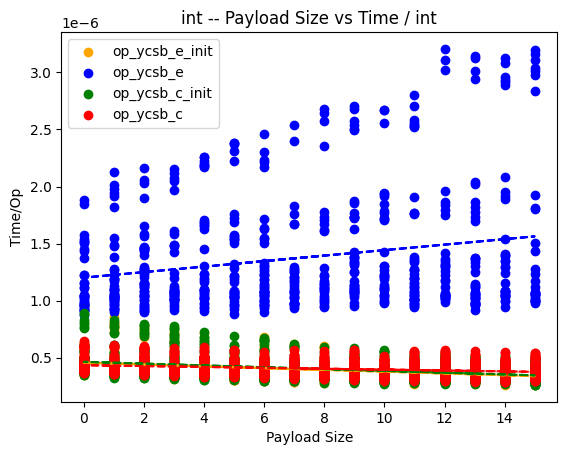

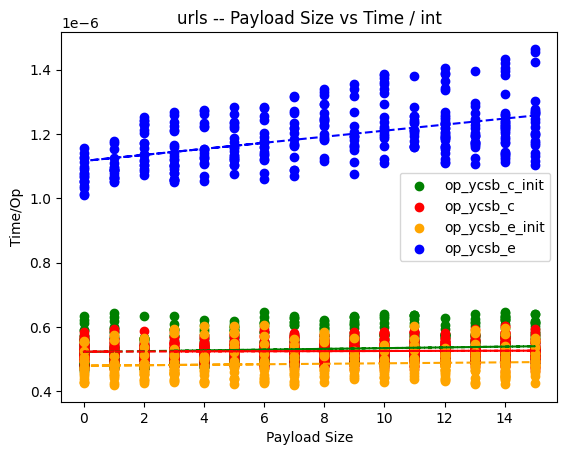

In [65]:
import numpy as np
plot_scatter(df_data_nam_int , 'int')
plot_scatter(df_data_name_urls, 'urls')

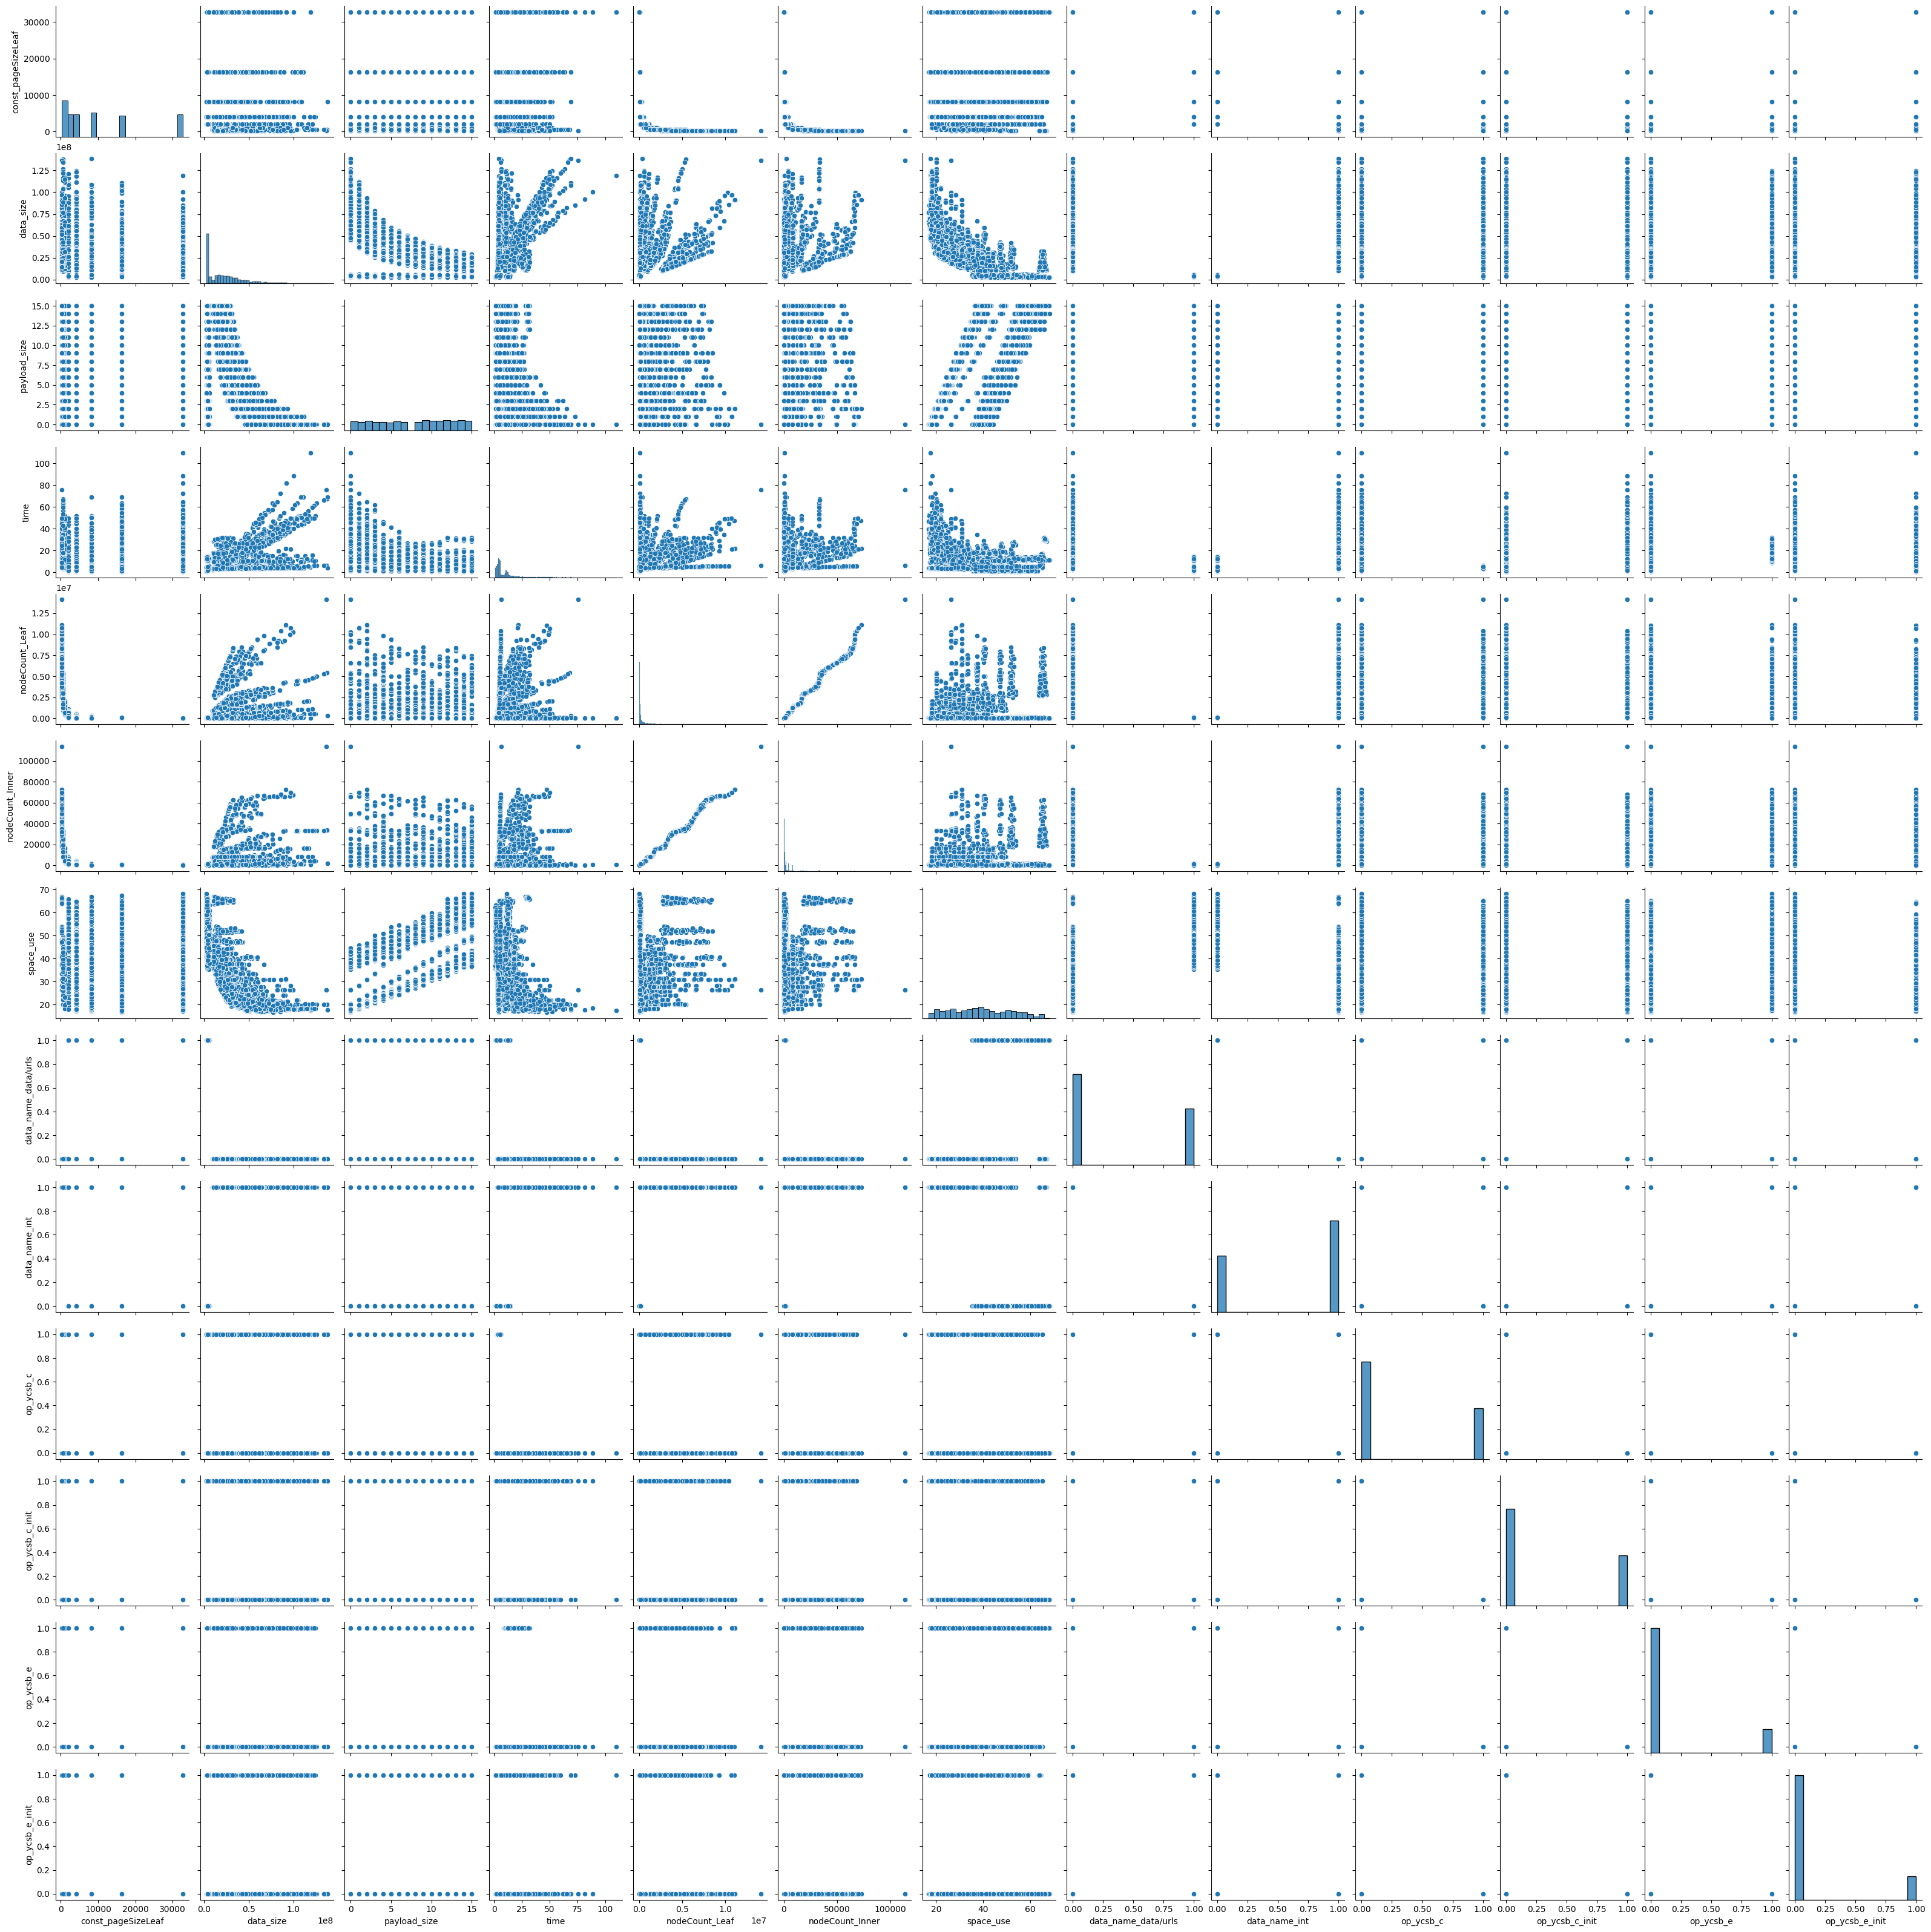

In [52]:
import seaborn as sns

# Create a pairplot
sns.pairplot(df)

# Display the plot
plt.show()


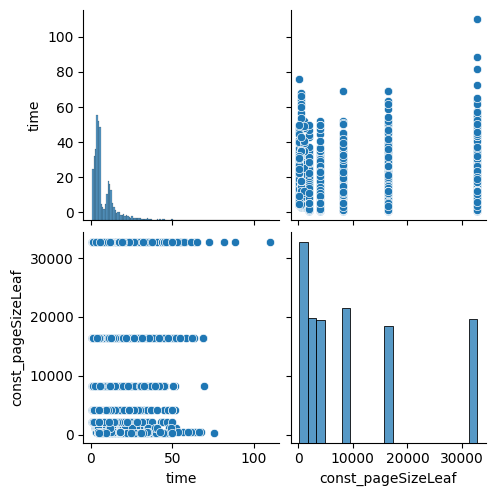

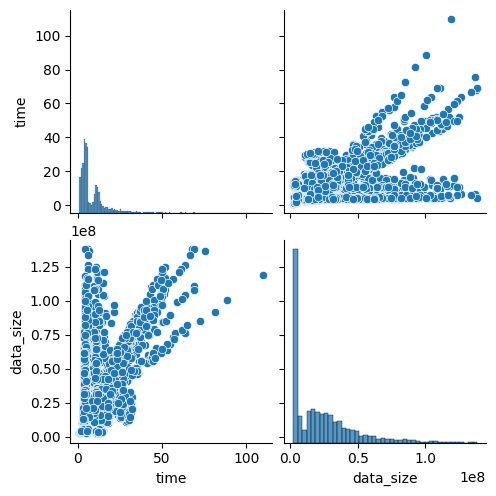

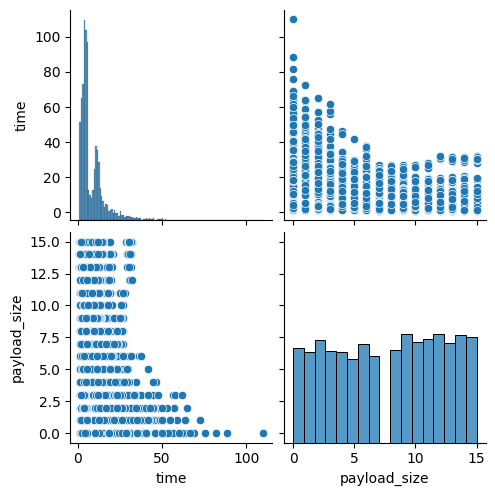

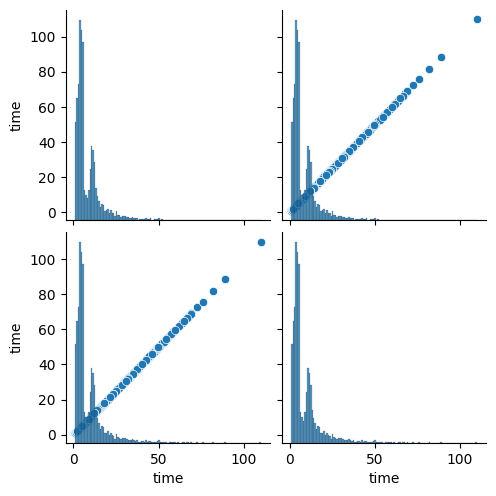

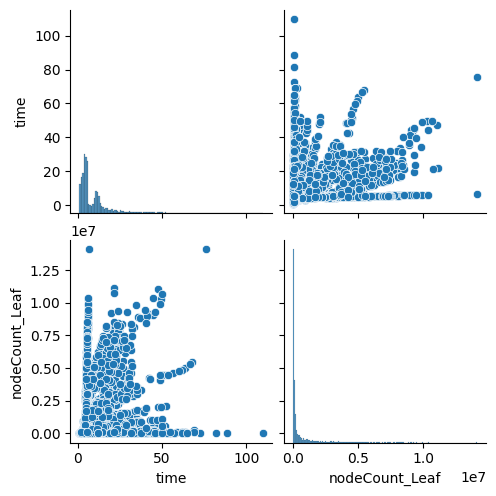

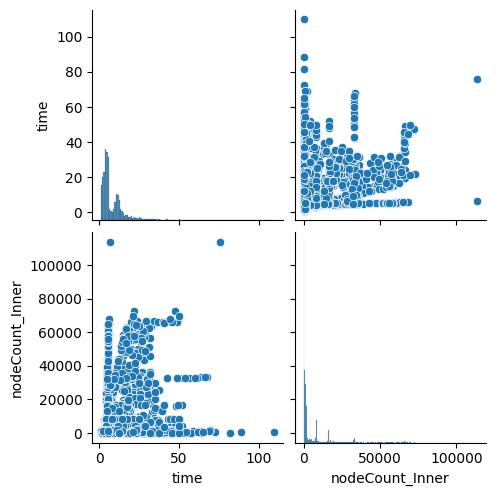

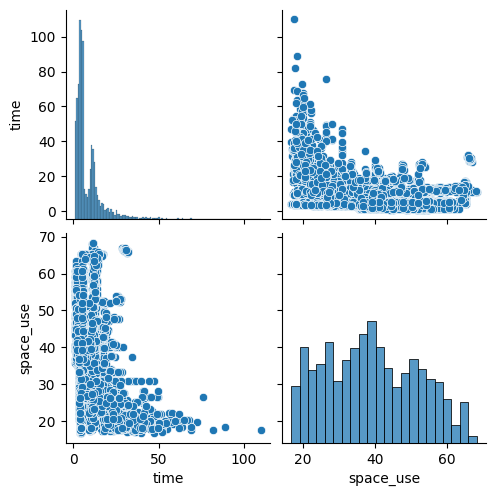

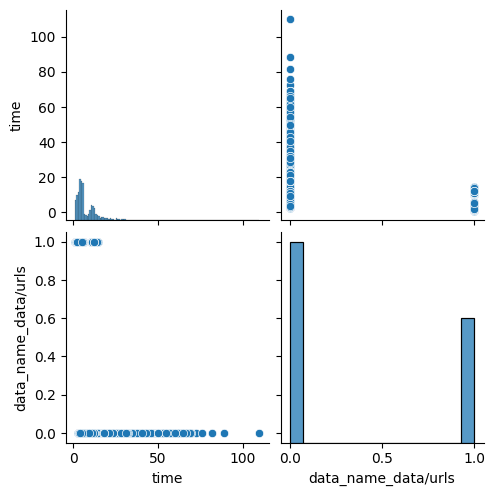

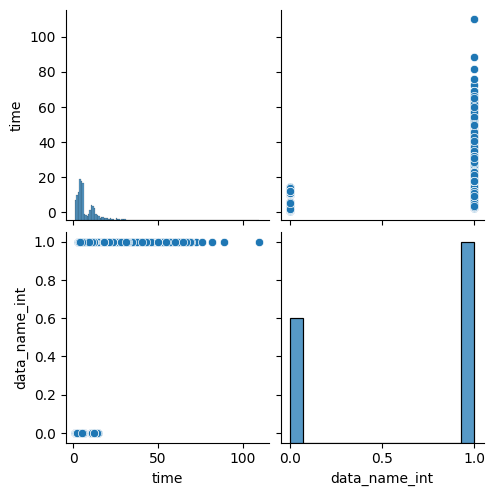

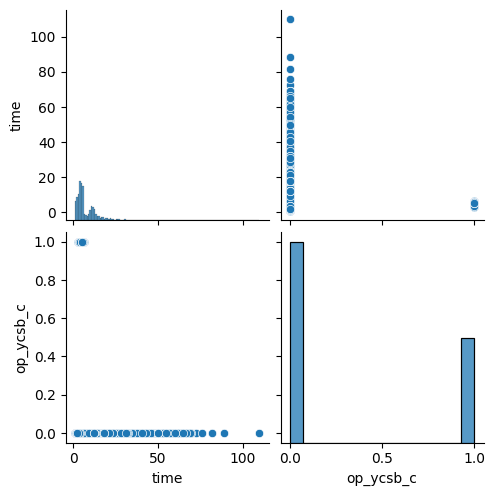

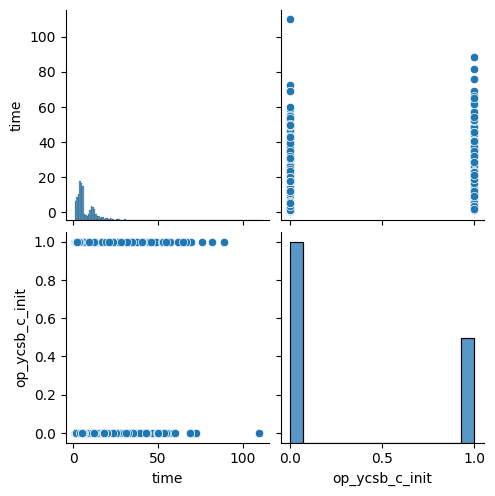

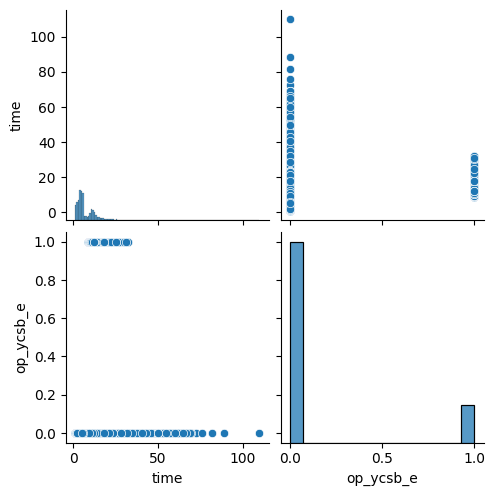

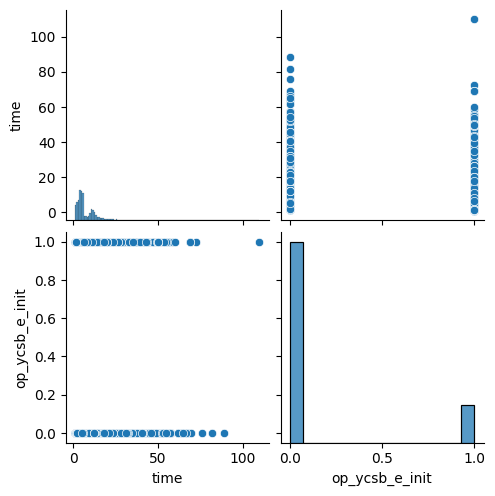

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each column in the dataframe
for column in df.columns:
    # Create a pairplot with the 'time' column and the current column
    sns.pairplot(df, vars=['time', column])
    
    # Display the plot
    plt.show()


In [60]:
import statsmodels.api as sm
X = df[['const_pageSizeLeaf', 'space_use', 'data_size']]
y = df['time']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     1311.
Date:                Sat, 13 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:15:38   Log-Likelihood:                -19674.
No. Observations:                5872   AIC:                         3.936e+04
Df Residuals:                    5868   BIC:                         3.938e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8874      0

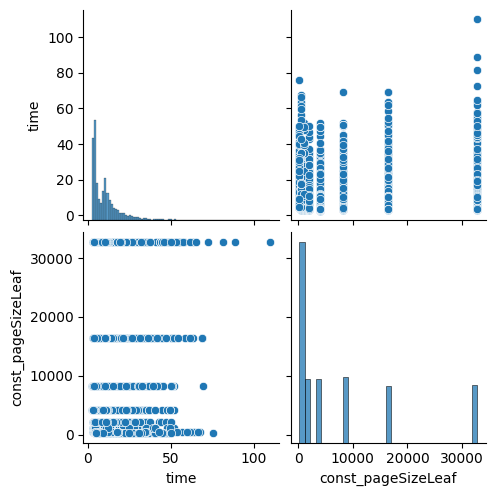

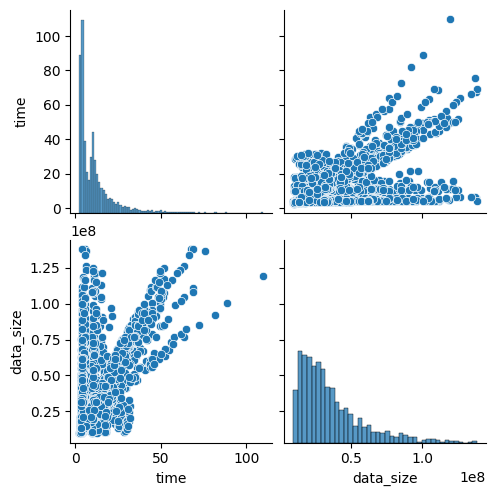

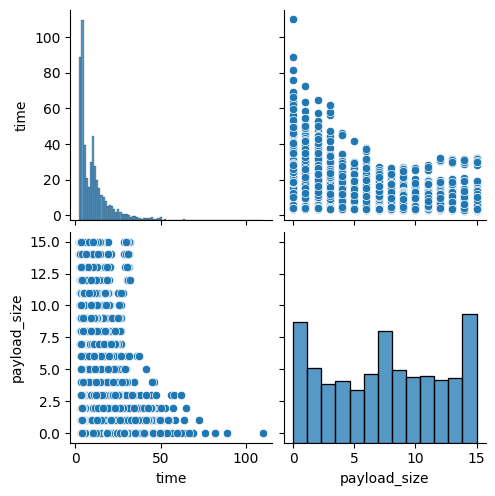

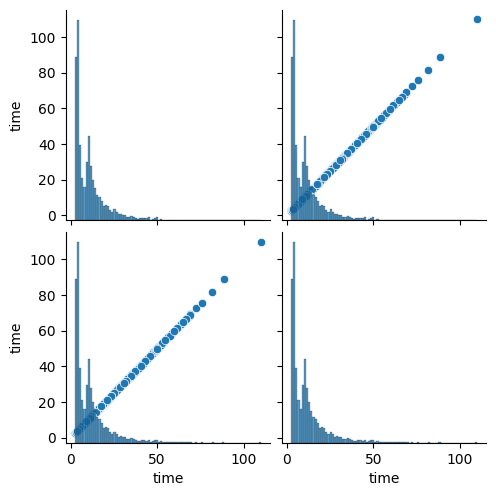

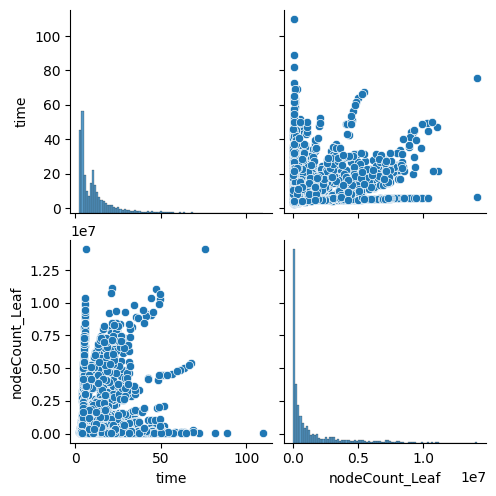

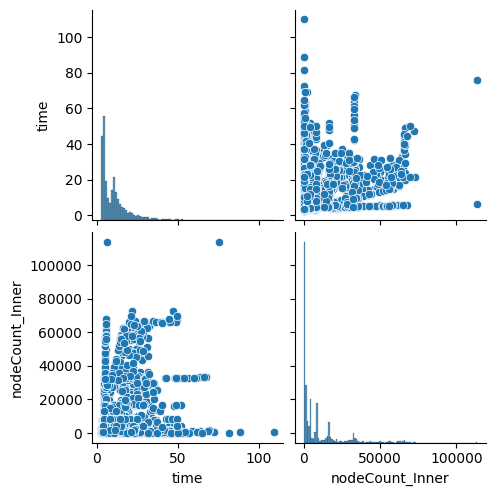

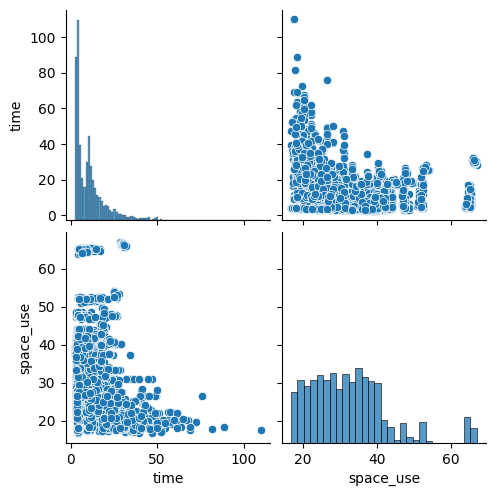

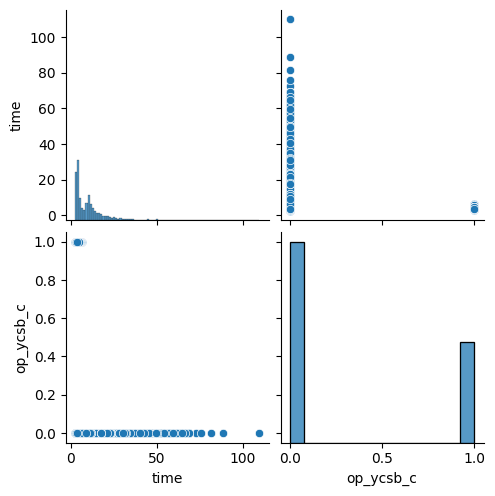

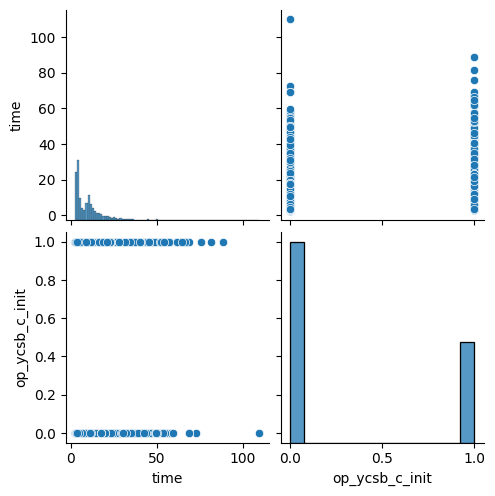

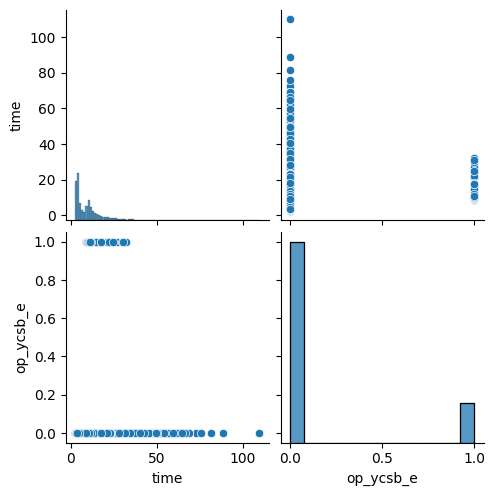

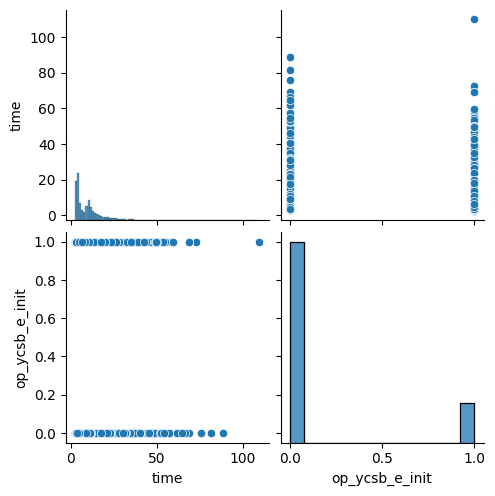

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each column in the dataframe
for column in df_data_nam_int.columns:
    # Create a pairplot with the 'time' column and the current column
    sns.pairplot(df_data_nam_int, vars=['time', column])
    
    # Display the plot
    plt.show()


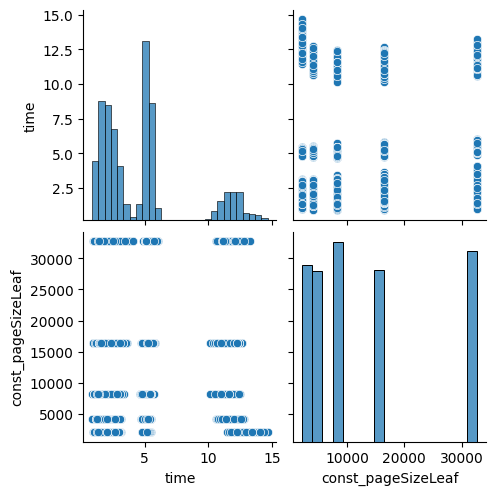

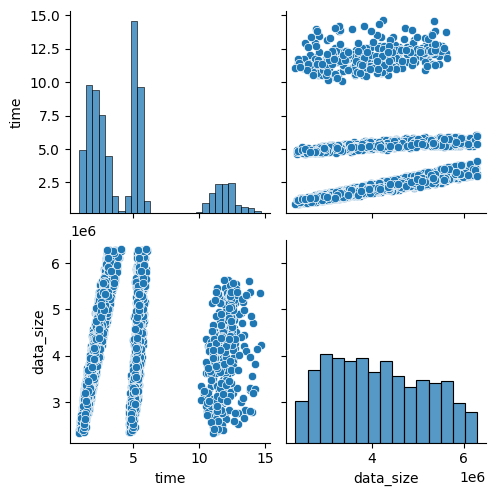

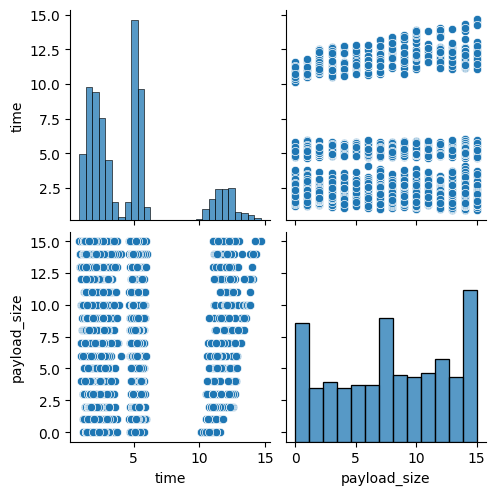

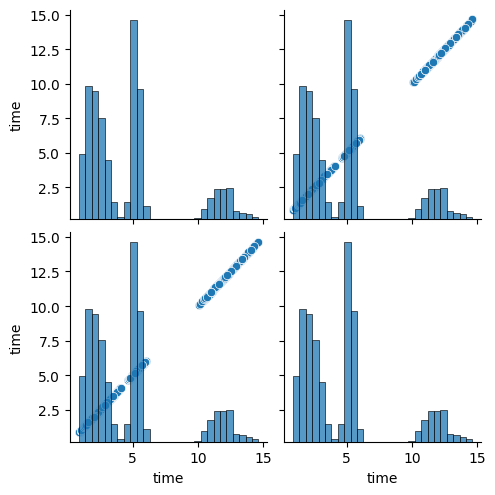

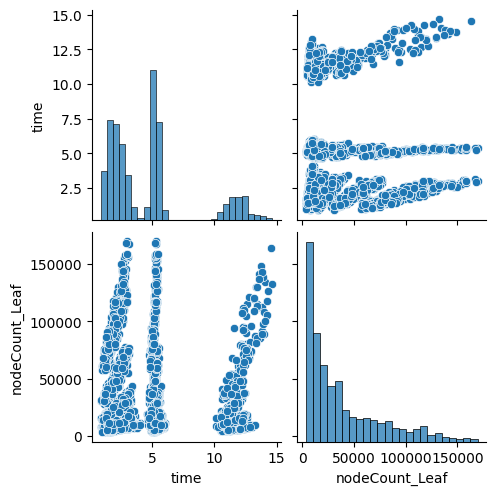

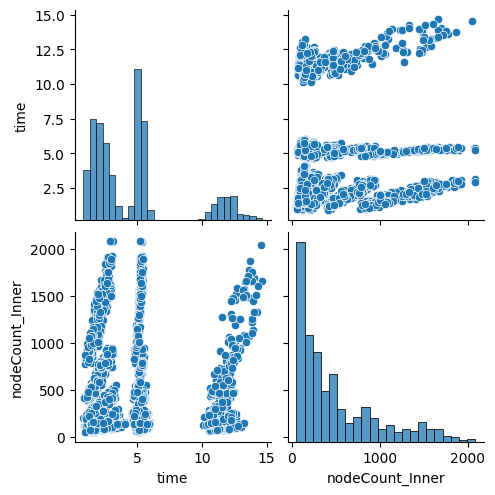

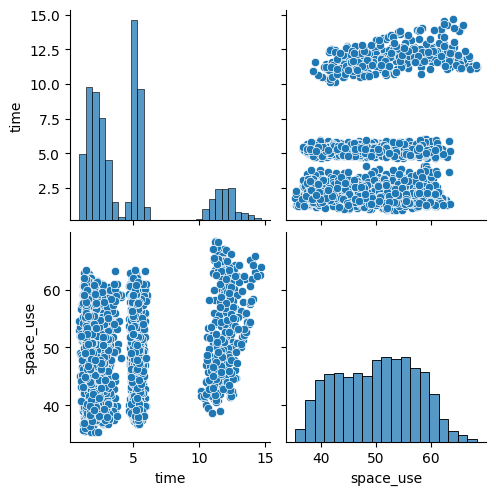

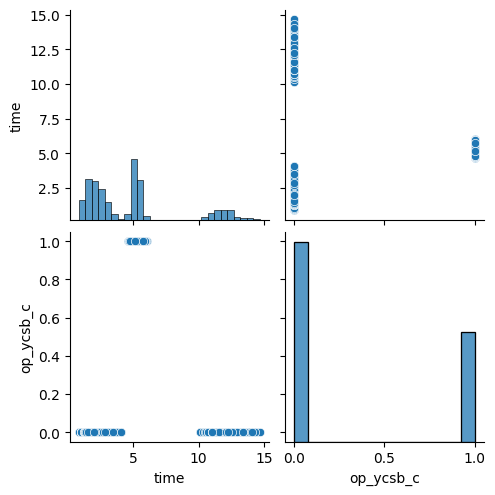

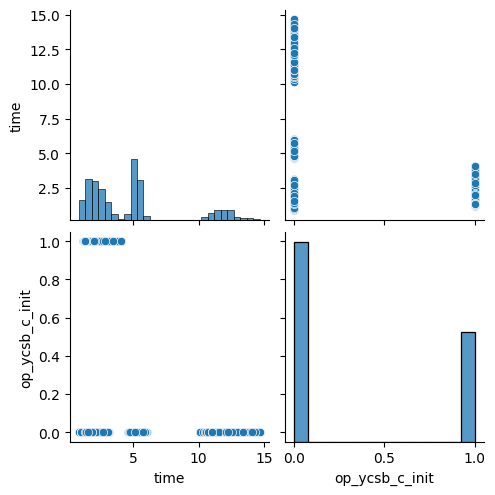

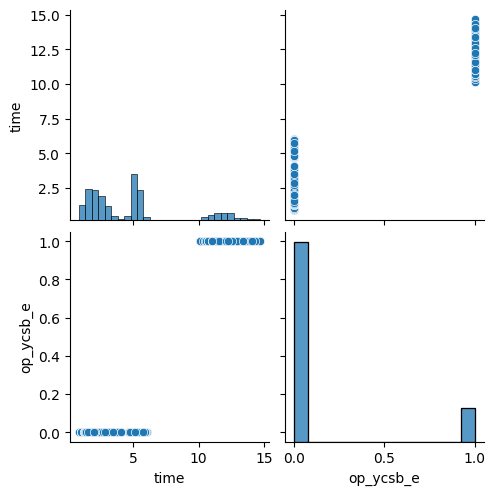

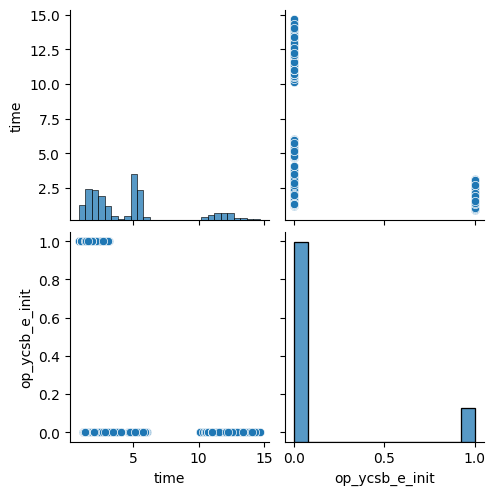

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over each column in the dataframe
for column in df_data_name_urls.columns:
    # Create a pairplot with the 'time' column and the current column
    sns.pairplot(df_data_name_urls, vars=['time', column])
    
    # Display the plot
    plt.show()
